<a href="https://colab.research.google.com/github/LearnByDoing2024/Youtube/blob/main/Episode5%2C_seaborn_intro_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn from Beginner to Advanced
This notebook will guide you through key features of Seaborn, from basic visualizations to advanced statistical plots.

## 1. Beginner Level

### 1.1 Introduction to Seaborn
Seaborn is a Python data visualization library based on Matplotlib, designed to make data visualization easier and more informative.

In [1]:
# Importing the Seaborn library for data visualization
import seaborn as sns

# Importing Matplotlib's Pyplot module for additional plotting functionalities
import matplotlib.pyplot as plt

# Loading a sample dataset 'tips' which is built into Seaborn
data = sns.load_dataset('tips')

# Displaying the first few rows of the 'tips' dataset to inspect the data
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1.2 Simple Seaborn Plot - Scatter Plot
Creating a basic scatter plot to visualize relationships between two variables.

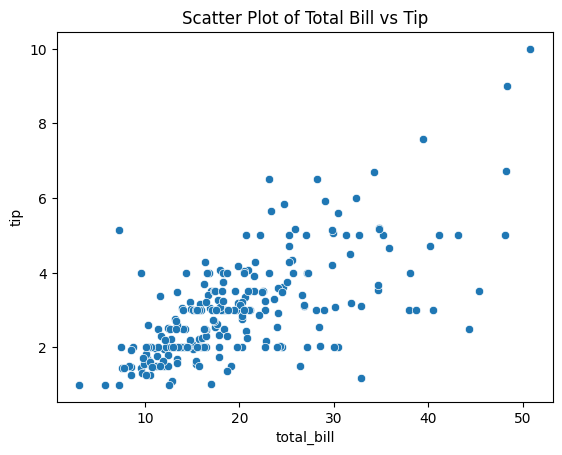

In [3]:
# Creating a scatter plot using Seaborn to visualize the relationship between 'total_bill' and 'tip'
sns.scatterplot(x='total_bill', y='tip', data=data)

# Adding a title to the scatter plot
plt.title('Scatter Plot of Total Bill vs Tip')

# Displaying the scatter plot
plt.show()


## 2. Intermediate Level

### 2.1 Categorical Data Visualization
Seaborn can be used to visualize categorical data using bar plots and box plots.

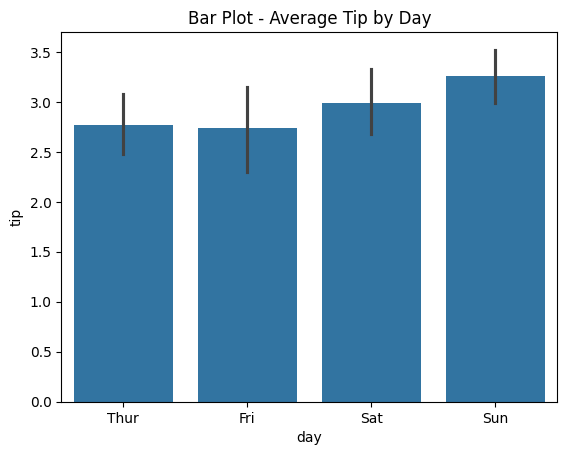

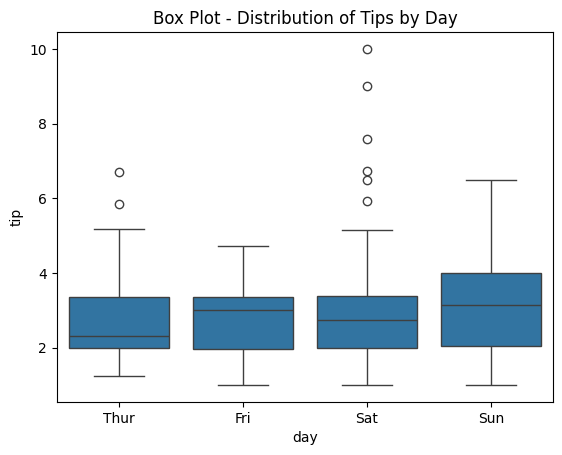

In [4]:
# Creating a bar plot using Seaborn to show the average tip by day
sns.barplot(x='day', y='tip', data=data)

# Adding a title to the bar plot
plt.title('Bar Plot - Average Tip by Day')

# Displaying the bar plot
plt.show()

# Creating a box plot using Seaborn to show the distribution of tips by day
sns.boxplot(x='day', y='tip', data=data)

# Adding a title to the box plot
plt.title('Box Plot - Distribution of Tips by Day')

# Displaying the box plot
plt.show()


The black lines on top of the bars in the bar plot you've uploaded are error bars. These bars represent the variability of the data and are typically used to visualize the uncertainty or the spread of the data around the mean (or median) values. Here's what these lines signify:

1. **Error Bar Interpretation**:
   - These lines usually represent the confidence interval around the mean of the data. A common default is the 95% confidence interval, which means there's a 95% chance that the true mean of the population from which the sample is drawn lies within this range.
   - They can also be set to represent one standard deviation or a specific percentile range depending on how the plot is configured.

2. **Purpose**:
   - The primary purpose of including error bars is to provide a visual gauge of the statistical reliability of the data. They help in understanding how spread out the data points are around the average value, which can be crucial for comparing groups.

3. **Analysis**:
   - When comparing bars, if the error bars of two groups do not overlap, it often suggests a statistically significant difference between the groups, assuming normal distribution and large enough sample sizes.
   - Conversely, overlapping error bars indicate that the difference might not be statistically significant, though further statistical testing would be required for confirmation.

These error bars add an important layer of information to the bar plot, helping to interpret the data beyond just the mean values represented by the height of the bars. They indicate the variability or consistency of the data on each day, influencing how conclusions might be drawn about daily tipping behaviors.

In [24]:
#@title combo
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming data is already loaded with the appropriate 'day' and 'tip' columns
# Example: data = sns.load_dataset('tips')

# Function to plot horizontal box plot and histogram below it for a given day, including quartile lines
def plot_day(day, data):
    day_data = data[data['day'] == day]
    quartiles = day_data['tip'].quantile([0.25, 0.5, 0.75])  # Calculate the quartiles

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column for plots

    # Horizontal box plot on the first subplot
    sns.boxplot(x='tip', data=day_data, ax=axes[0], orient='h', color='skyblue')
    axes[0].set_title(f'Horizontal Box Plot of Tips on {day}')
    for quartile in quartiles:
        axes[0].axvline(x=quartile, color='red', linestyle='--')  # Draw quartile lines

    # Histogram on the second subplot
    sns.histplot(day_data, x='tip', ax=axes[1], bins=15, color='lightblue', kde=False)
    axes[1].set_title(f'Histogram of Tips on {day}')
    for quartile in quartiles:
        axes[1].axvline(x=quartile, color='red', linestyle='--')  # Draw quartile lines

    plt.tight_layout()
    plt.show()

# Create tabs for each day
tabs = widgets.Tab()
days = data['day'].unique()  # Get unique days
tab_children = []

for day in days:
    # Create an output widget for each tab
    output = widgets.Output()
    with output:
        plot_day(day, data)
    tab_children.append(output)

tabs.children = tab_children

for i, day in enumerate(days):
    tabs.set_title(i, day)  # Set title for each tab

display(tabs)


1. **Quartiles (Q1, Q2, Q3)**:
   - **Q1**: The first quartile, showing the 25th percentile of the data.
   - **Q2**: The median (second quartile), showing the 50th percentile of the data.
   - **Q3**: The third quartile, showing the 75th percentile of the data.

2. **Whiskers**:
   - These extend from the box to the smallest and largest values within 1.5 times the interquartile range from the Q1 and Q3, respectively.

3. **Dots (Outliers)**:
   - The dots represent tips that fall outside the range of the whiskers. These values are considered outliers because they are below $$ Q1 - 1.5 \times \text{IQR} $$ or above $$ Q3 + 1.5 \times \text{IQR} $$, where IQR is the interquartile range $$ (Q3 - Q1) $$.
   - Despite the whiskers showing the maximum and minimum values within a conventional range, outliers are highlighted to show data points that are significantly higher or lower than the majority of the data, suggesting unusual tipping behaviors or special cases.

The presence of these dots is crucial for identifying and analyzing data points that differ significantly from the norm, which might indicate anomalies or special circumstances affecting the data, such as large parties or events that might tip unusually well or poorly compared to regular days. These outliers can provide insights into extremes that may warrant further investigation or consideration in analysis or decision-making processes.

### 2.2 Pair Plot
Pair plots visualize relationships between pairs of variables in a dataset.

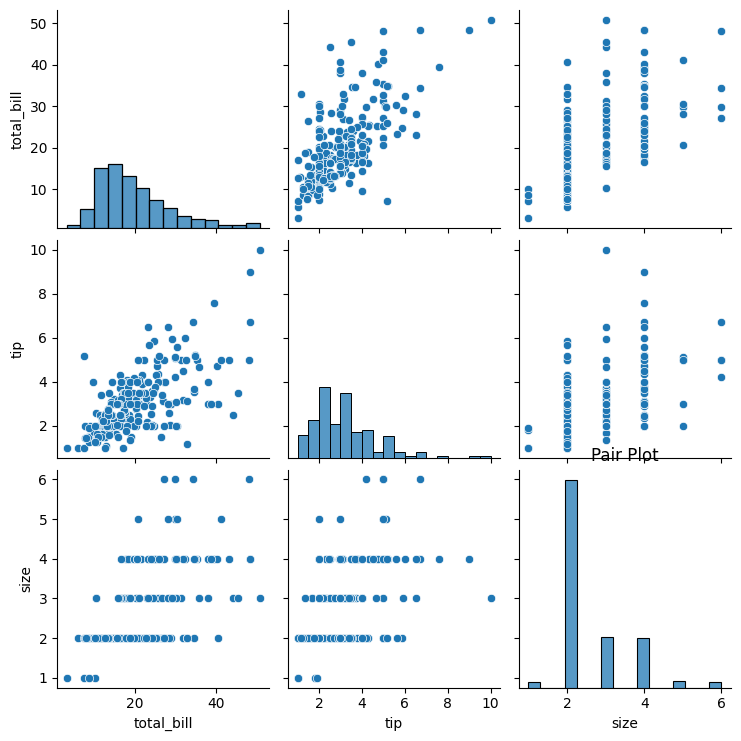

In [5]:
# Creating a pair plot using Seaborn to visualize relationships between all numerical variables in the dataset
sns.pairplot(data)

# Adding a title to the pair plot (Note: pair plots don't typically use plt.title, so this won't affect the plot)
plt.title('Pair Plot')

# Displaying the pair plot
plt.show()


## 3. Advanced Level

### 3.1 Heatmaps
Heatmaps are useful for visualizing matrix-style data, such as correlation matrices.

In [6]:
# Creating a correlation matrix to compute the pairwise correlation of numerical columns in the dataset
corr = data.corr()

# Creating a heatmap using Seaborn to visualize the correlation matrix, with annotations and a color scheme
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding a title to the heatmap for better understanding
plt.title('Heatmap of Correlation Matrix')

# Displaying the heatmap
plt.show()


ValueError: could not convert string to float: 'No'

In [7]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
# Importing the pandas library for data manipulation
import pandas as pd

# Using the get_dummies function from pandas to convert categorical variables ('sex', 'smoker', 'day', 'time')
# into one-hot encoded variables (binary columns for each category)
data1 = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'])


In [10]:
data1

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,False,True,False,False,True,False,False,True
240,27.18,2.00,2,False,True,True,False,False,False,True,False,False,True
241,22.67,2.00,2,True,False,True,False,False,False,True,False,False,True
242,17.82,1.75,2,True,False,False,True,False,False,True,False,False,True


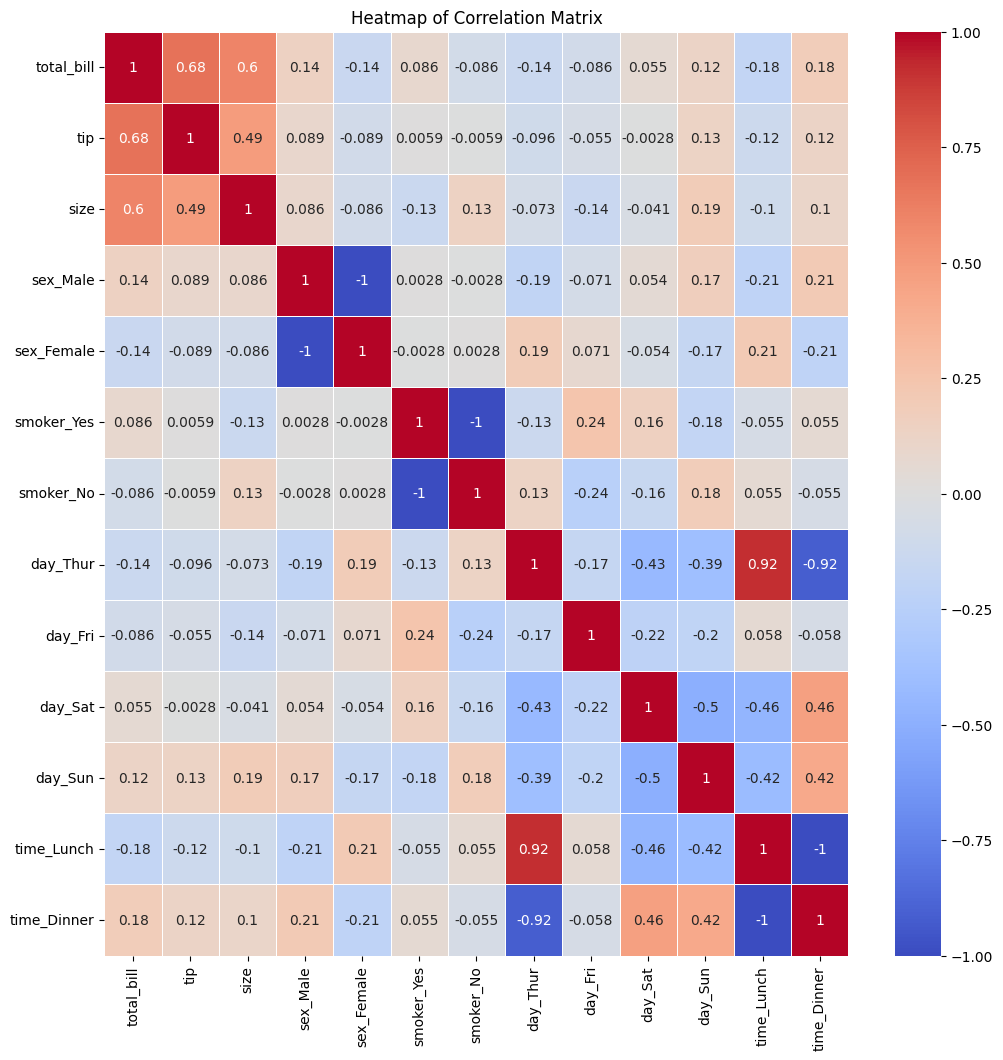

In [14]:
# Creating a correlation matrix from the one-hot encoded dataset 'data1' to compute pairwise correlations of numerical columns
corr = data1.corr()

# Setting the figure size for the heatmap to 12x12 for better visibility
plt.figure(figsize=(12, 12))

# Creating a heatmap using Seaborn to visualize the correlation matrix with annotations, a color scheme, and line widths for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding a title to the heatmap for clear identification
plt.title('Heatmap of Correlation Matrix')

# Displaying the heatmap
plt.show()


In [15]:
corr

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
total_bill,1.000000,0.675734,0.598315,0.144877,-0.144877,0.085721,-0.085721,-0.138174,-0.086168,0.054919,0.122953,-0.183118,0.183118
tip,0.675734,1.000000,0.489299,0.088862,-0.088862,0.005929,-0.005929,-0.095879,-0.055463,-0.002790,0.125114,-0.121629,0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.086195,-0.133178,0.133178,-0.072598,-0.142184,-0.041121,0.193054,-0.103411,0.103411
sex_Male,0.144877,0.088862,0.086195,1.000000,-1.000000,0.002816,-0.002816,-0.194445,-0.071060,0.053957,0.168106,-0.205231,0.205231
sex_Female,-0.144877,-0.088862,-0.086195,-1.000000,1.000000,-0.002816,0.002816,0.194445,0.071060,-0.053957,-0.168106,0.205231,-0.205231
smoker_Yes,0.085721,0.005929,-0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.128534,0.244316,0.155744,-0.181624,-0.054921,0.054921
smoker_No,-0.085721,-0.005929,0.133178,-0.002816,0.002816,-1.000000,1.000000,0.128534,-0.244316,-0.155744,0.181624,0.054921,-0.054921
day_Thur,-0.138174,-0.095879,-0.072598,-0.194445,0.194445,-0.128534,0.128534,1.000000,-0.169608,-0.434480,-0.392566,0.917996,-0.917996
day_Fri,-0.086168,-0.055463,-0.142184,-0.071060,0.071060,0.244316,-0.244316,-0.169608,1.000000,-0.216319,-0.195451,0.058159,-0.058159
day_Sat,0.054919,-0.002790,-0.041121,0.053957,-0.053957,0.155744,-0.155744,-0.434480,-0.216319,1.000000,-0.500682,-0.462709,0.462709


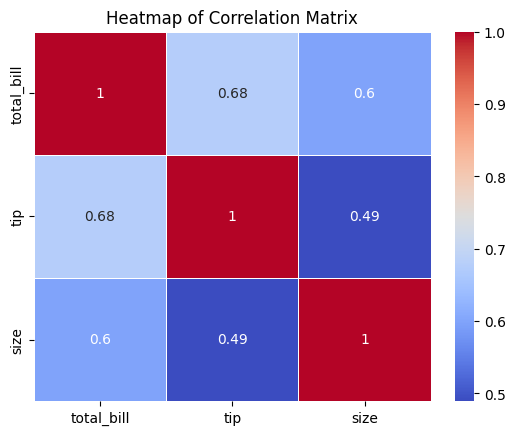

In [16]:
# Defining a list of categorical features (one-hot encoded columns) that we want to exclude from the correlation calculation
categorical_features = ['sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes',
                        'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner', 'time_Lunch']

# Creating a new DataFrame by dropping the categorical features, leaving only numerical columns for the correlation matrix
data1_numeric = data1.drop(columns=categorical_features)

# Calculating the correlation matrix for the remaining numerical columns
corr1 = data1_numeric.corr()

# Creating a heatmap to visualize the correlation matrix of the numerical features, with annotations and a color scheme
sns.heatmap(corr1, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding a title to the heatmap for better context
plt.title('Heatmap of Correlation Matrix')

# Displaying the heatmap
plt.show()


### 3.2 FacetGrid
FacetGrid allows visualization of data across multiple subplots based on categorical variables.

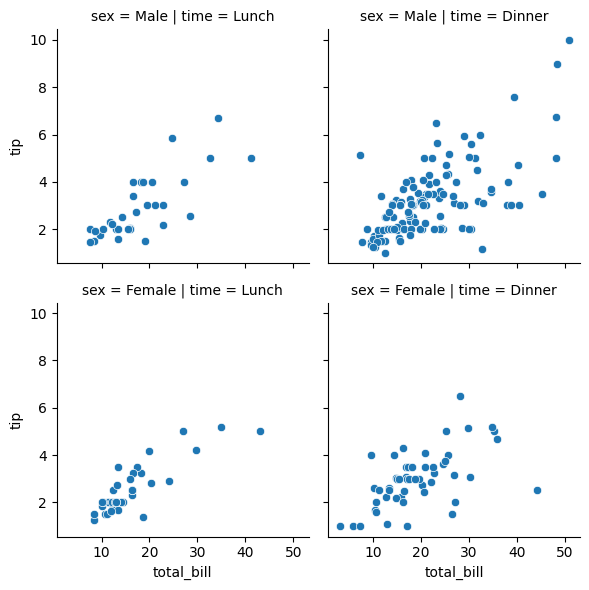

In [17]:
# Creating a FacetGrid to visualize scatter plots of 'total_bill' vs 'tip',
# with separate plots for each combination of 'time' (columns) and 'sex' (rows)
g = sns.FacetGrid(data, col='time', row='sex')

# Mapping a scatter plot onto the grid for 'total_bill' (x-axis) and 'tip' (y-axis)
g.map(sns.scatterplot, 'total_bill', 'tip')

# Displaying the grid of scatter plots
plt.show()


### 3.3 Violin Plot
Violin plots show the distribution of the data across different categories.

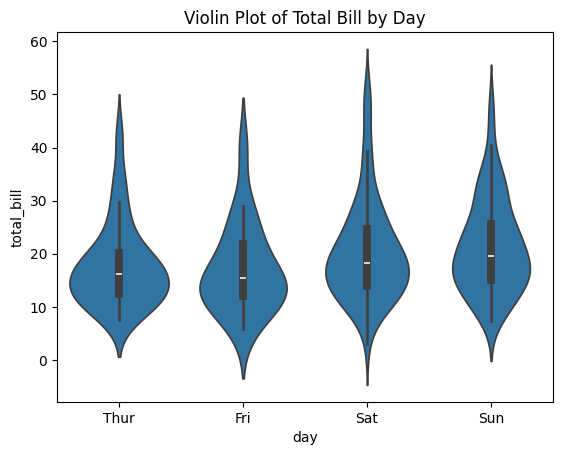

In [18]:
# Creating a violin plot using Seaborn to visualize the distribution of 'total_bill' for each day of the week
sns.violinplot(x='day', y='total_bill', data=data)

# Adding a title to the violin plot for clarity
plt.title('Violin Plot of Total Bill by Day')

# Displaying the violin plot
plt.show()


## Conclusion
Seaborn simplifies the creation of informative and attractive visualizations. It provides a high-level API to build statistical plots.